In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Import custom scripts
from data_preparation import load_data, clean_data
from feature_engineering import create_features

In [4]:
# Setup notebook environment
%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [5]:
filepath = r'C:\Users\ASUS\OneDrive\Desktop\Hospital_Readmission_Prediction\data\diabetes_readmission.csv'
df_raw = load_data(filepath)
df_clean = clean_data(df_raw.copy())

Loading data...
Data loaded successfully.
Cleaning data...
Data shape after cleaning: (101763, 43)
Data cleaning complete.


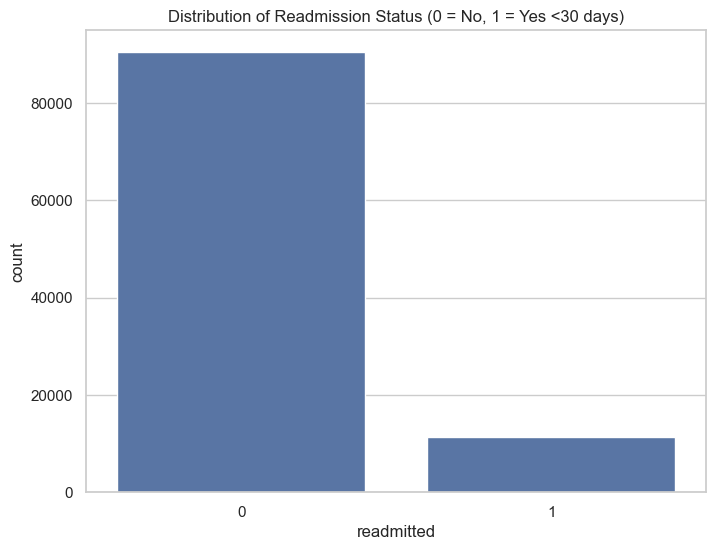

readmitted
0    0.888398
1    0.111602
Name: proportion, dtype: float64


In [6]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df_clean)
plt.title('Distribution of Readmission Status (0 = No, 1 = Yes <30 days)')
plt.show()
print(df_clean['readmitted'].value_counts(normalize=True))


--- Analyzing Numerical Features ---


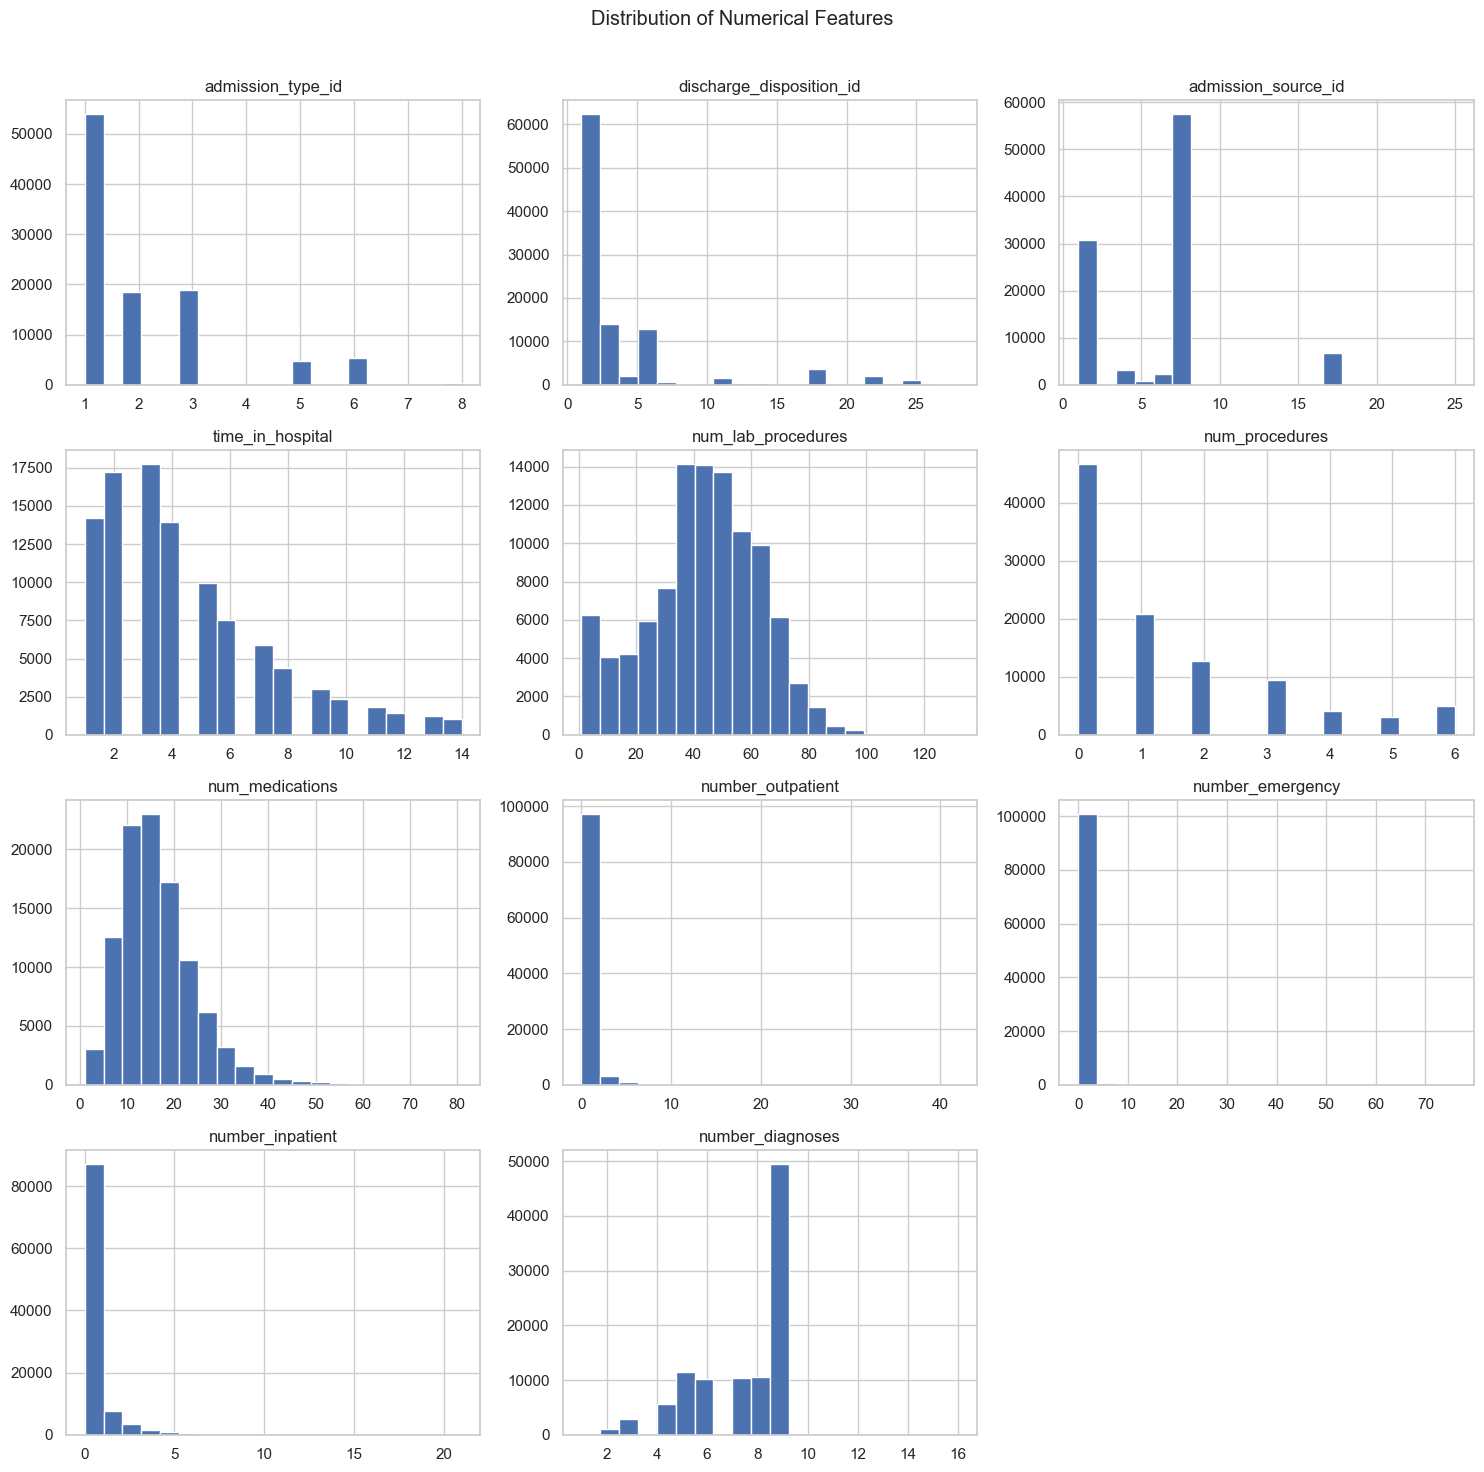

In [9]:
# --- Univariate Analysis: Numerical Features ---
numerical_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('readmitted') # Remove target from this list

print("\n--- Analyzing Numerical Features ---")
df_clean[numerical_cols].hist(figsize=(15, 15), bins=20, layout=(4, 3))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


--- Analyzing Categorical Features ---


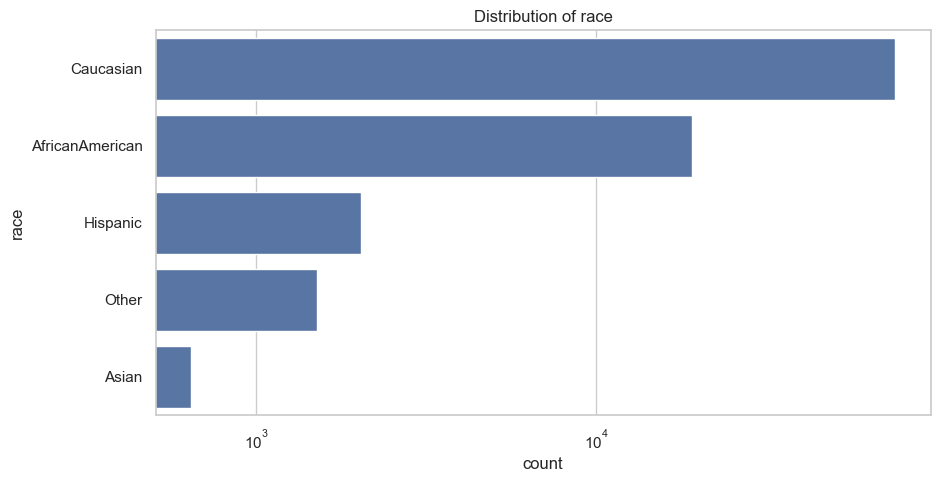

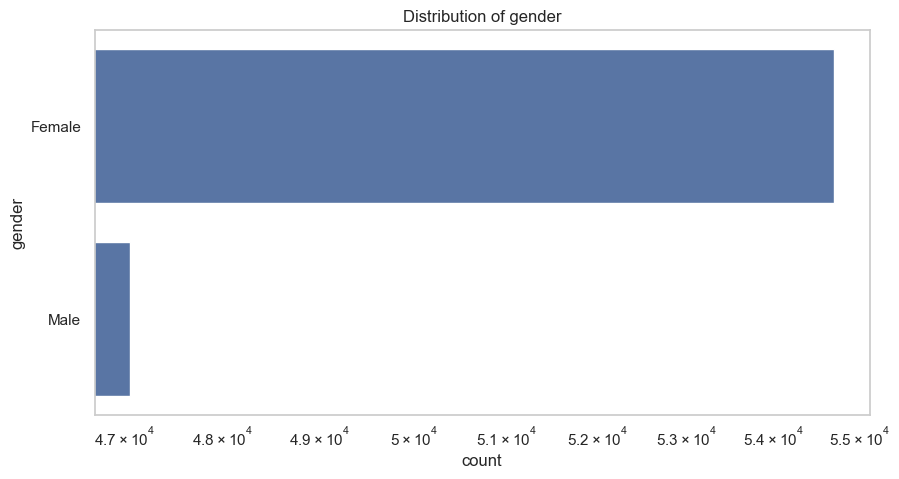

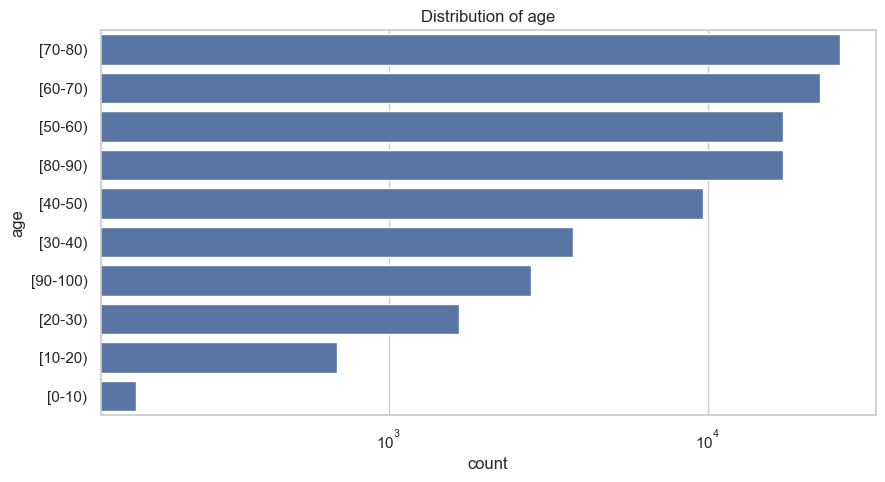

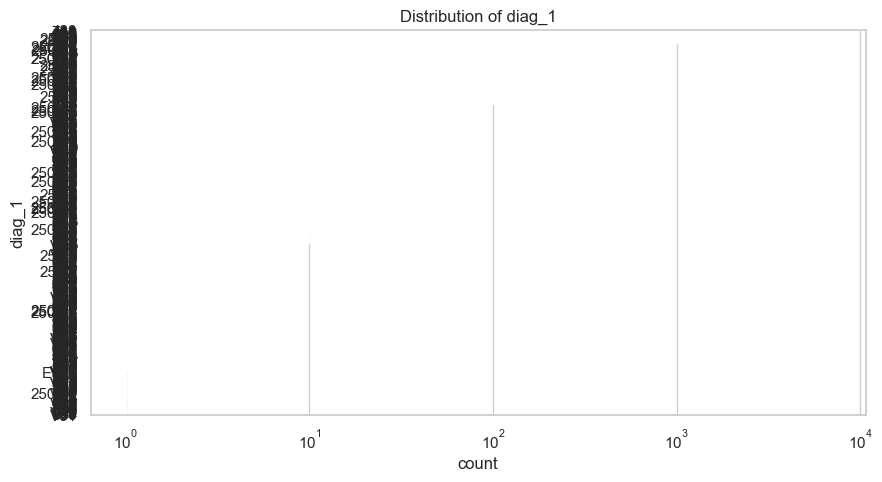

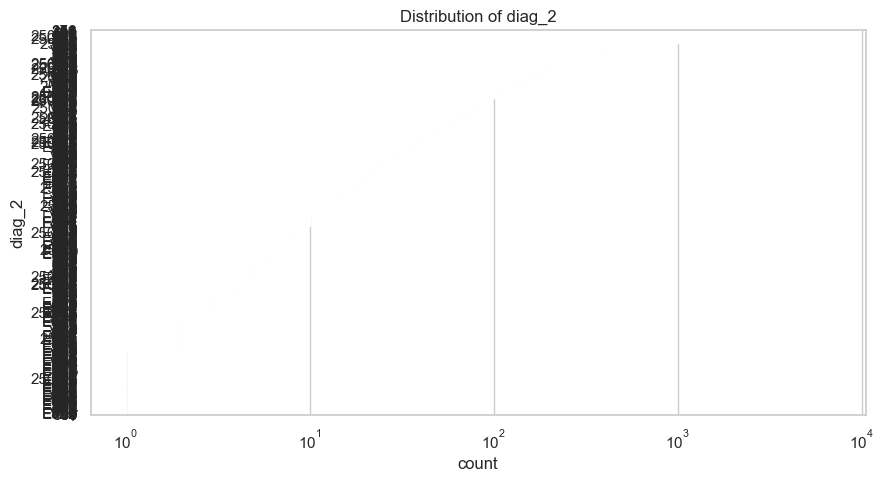

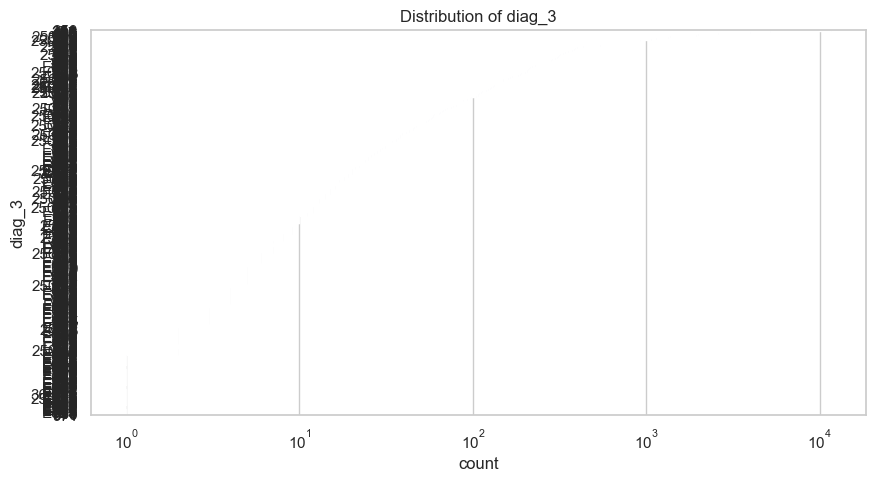

In [10]:
# --- Univariate Analysis: Categorical Features ---
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("\n--- Analyzing Categorical Features ---")
for col in categorical_cols[:6]: # Display first 6 for brevity
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df_clean, order=df_clean[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xscale('log') # Use log scale for better visibility of smaller categories
    plt.show()


--- Bivariate Analysis: Numerical Features vs. Readmission ---


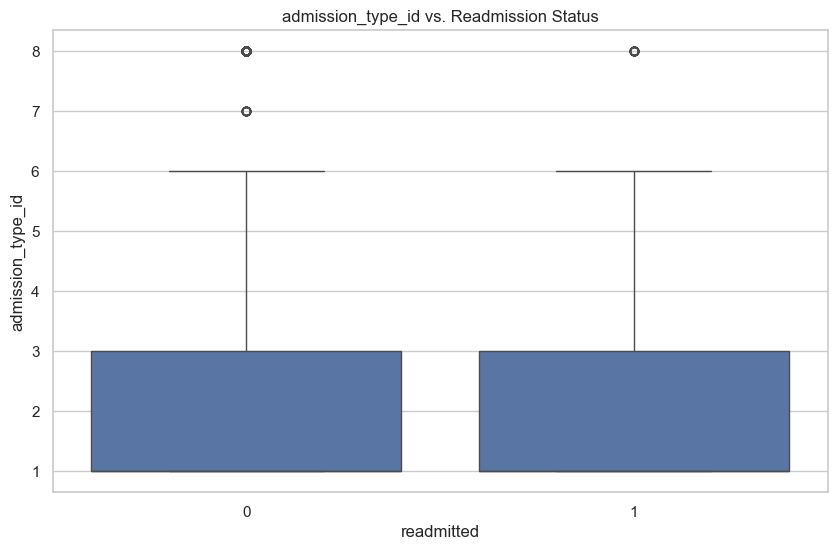

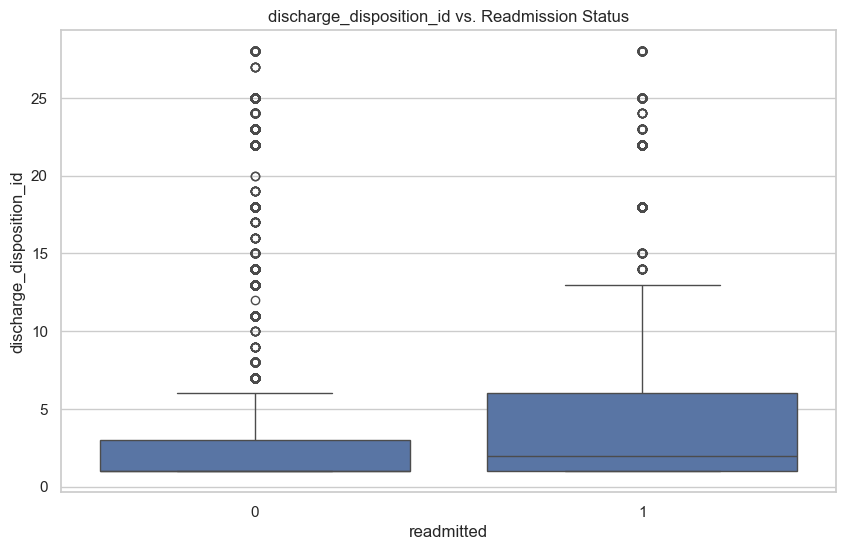

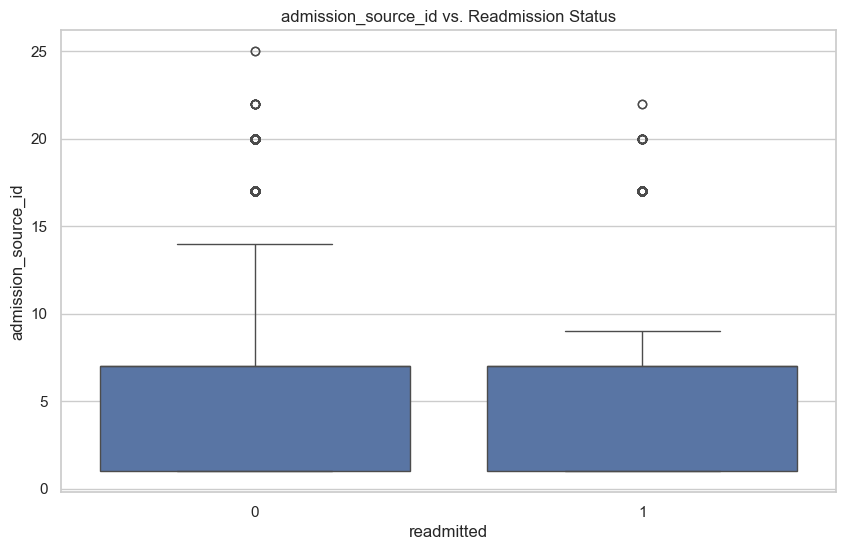

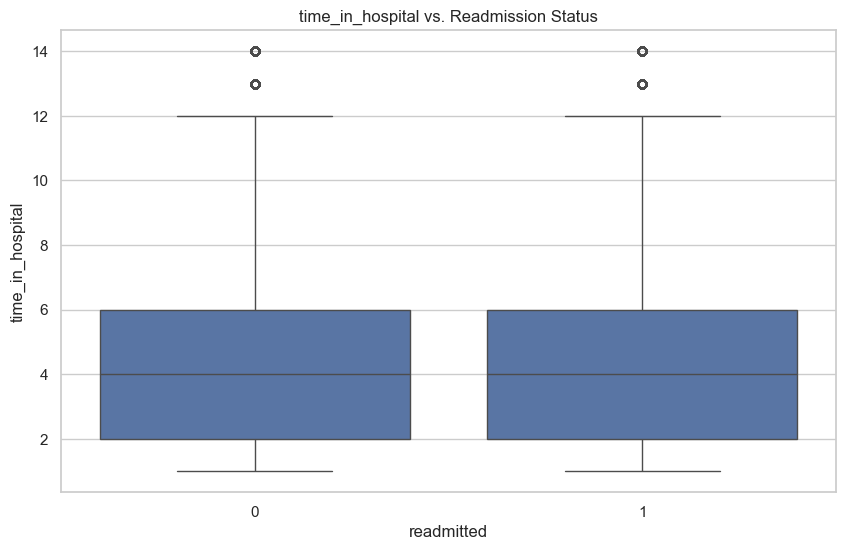

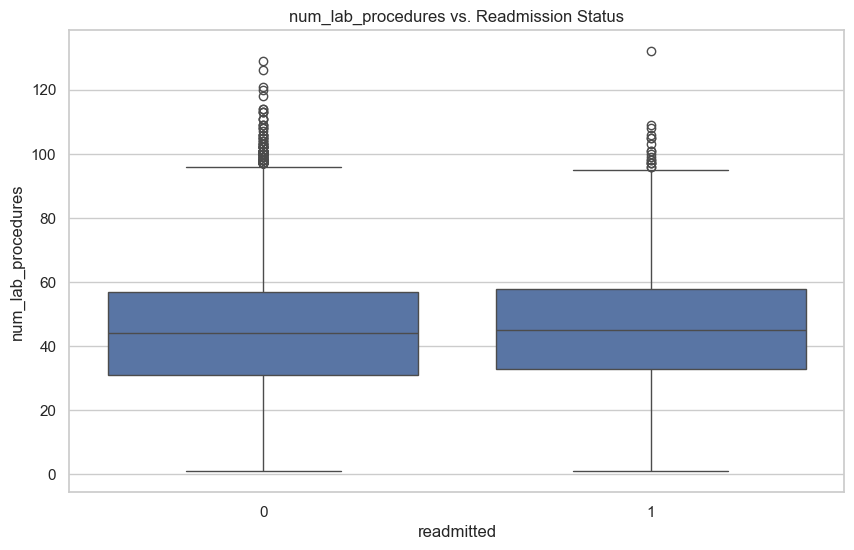

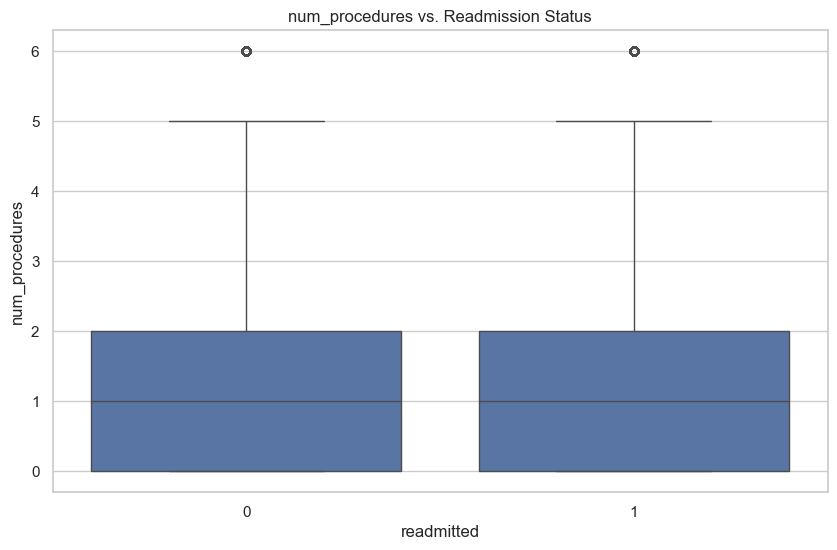

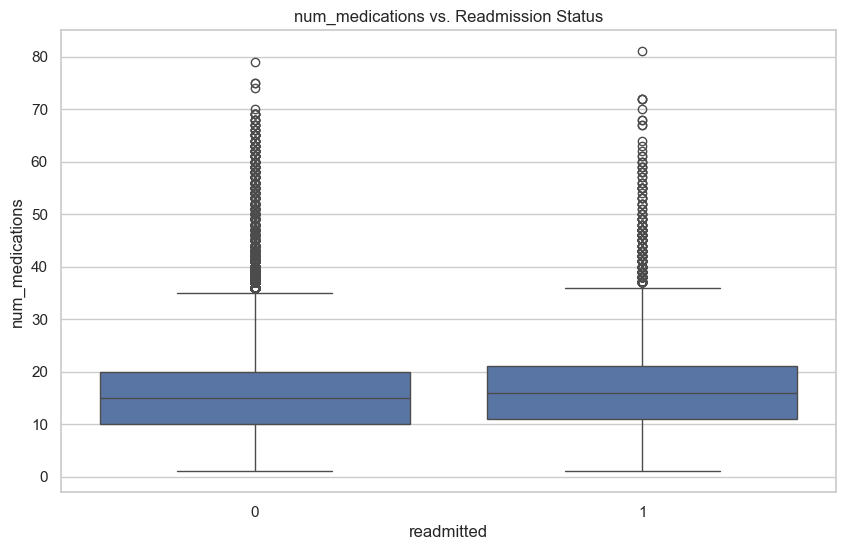

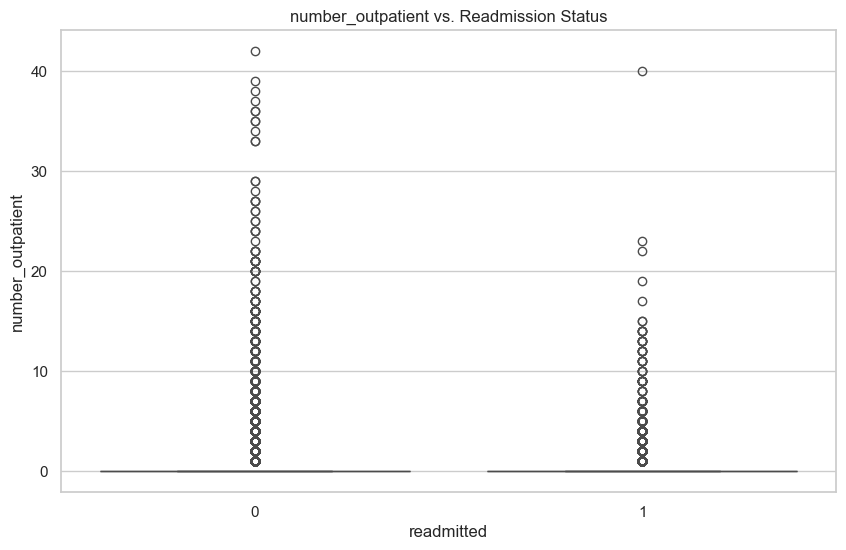

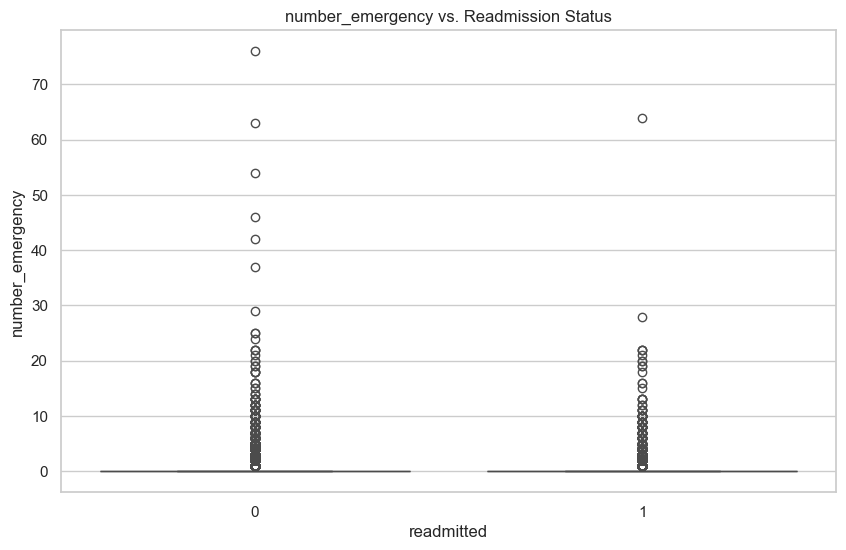

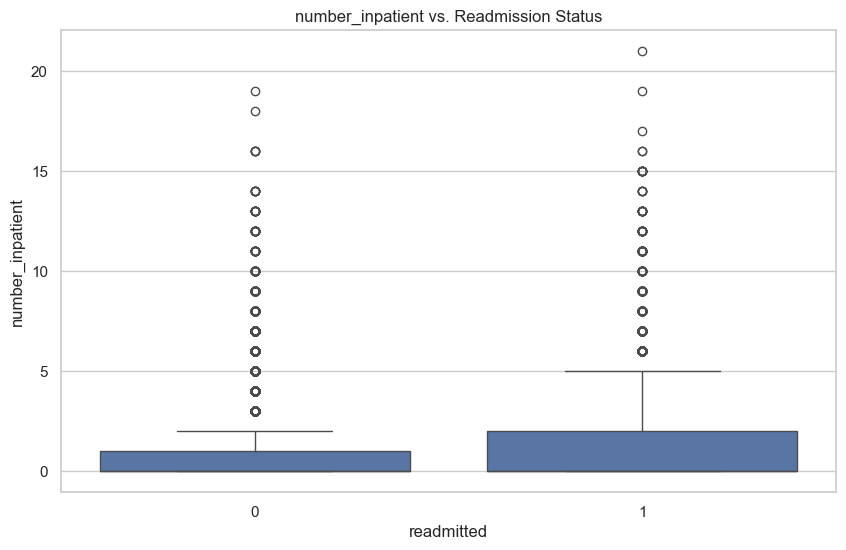

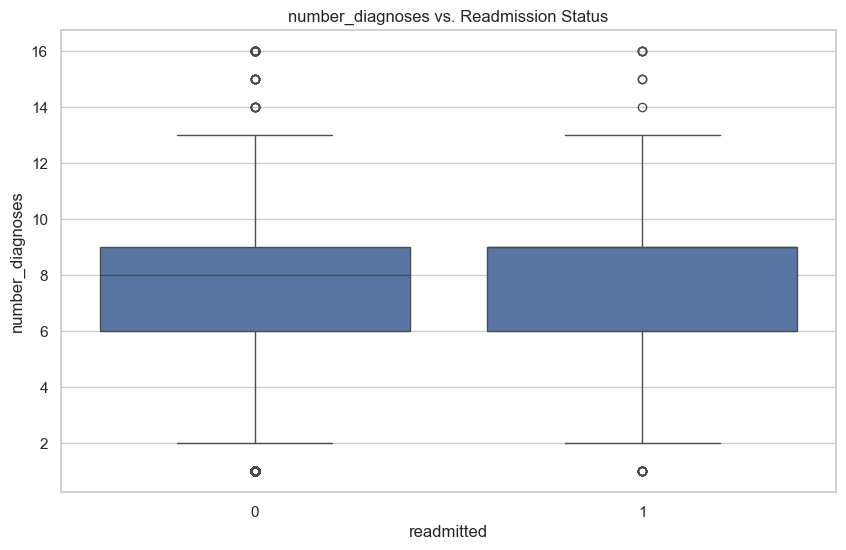

In [11]:
# --- Bivariate Analysis: Features vs. Readmission ---

# Numerical features vs. Readmission
print("\n--- Bivariate Analysis: Numerical Features vs. Readmission ---")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='readmitted', y=col, data=df_clean)
    plt.title(f'{col} vs. Readmission Status')
    plt.show()


--- Bivariate Analysis: Categorical Features vs. Readmission ---


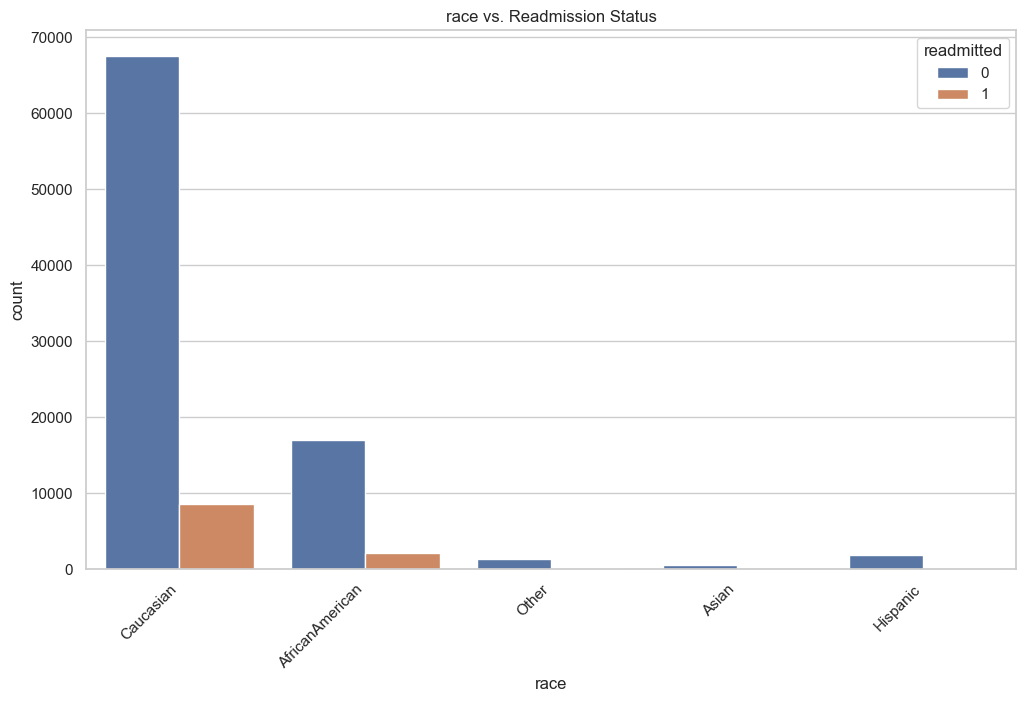

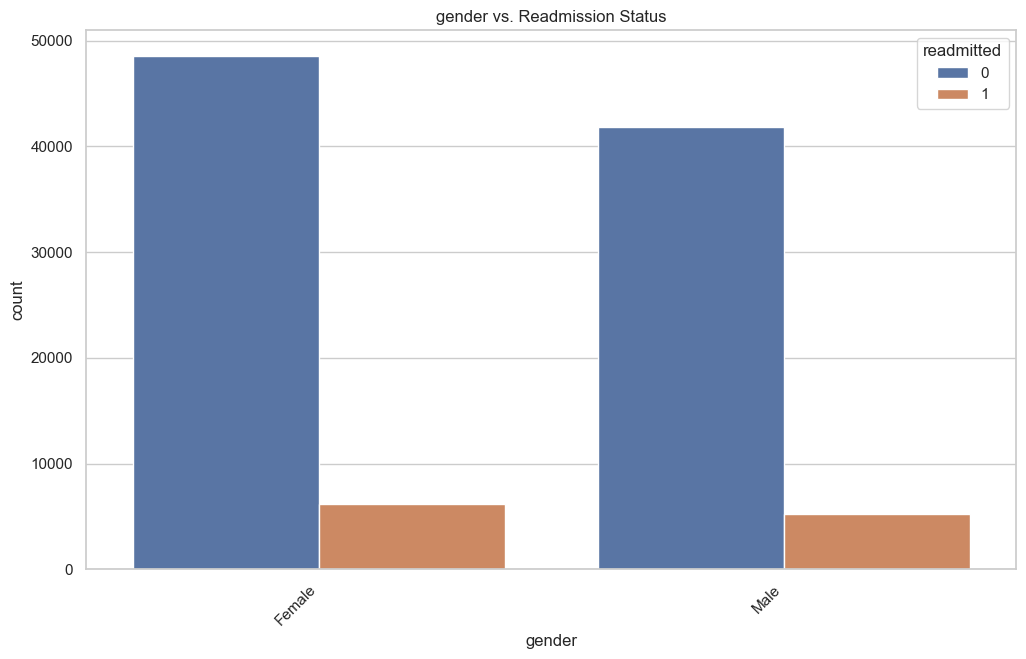

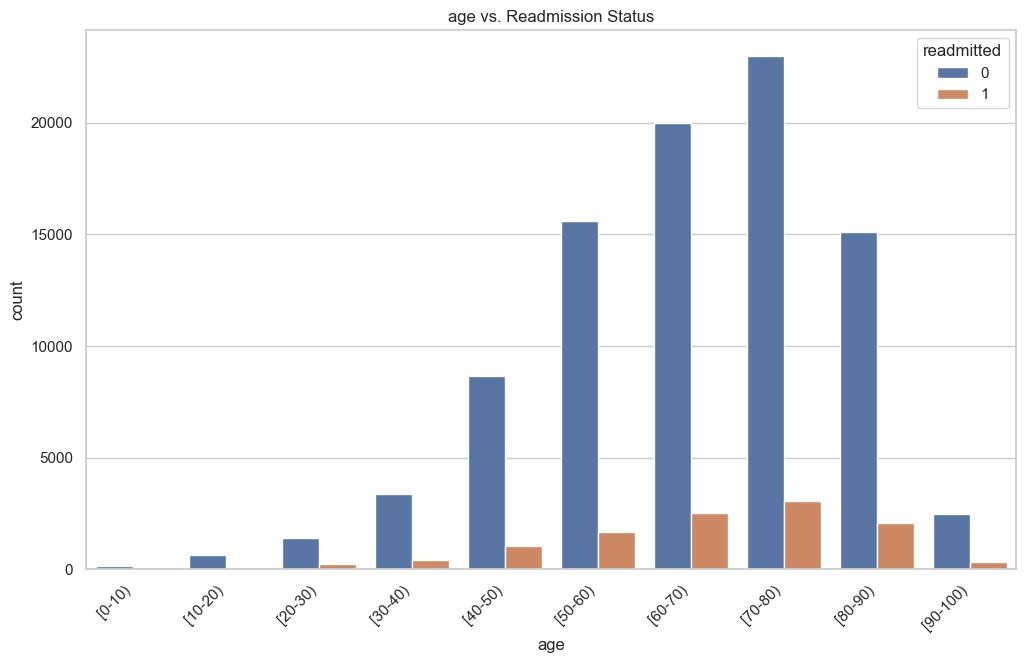

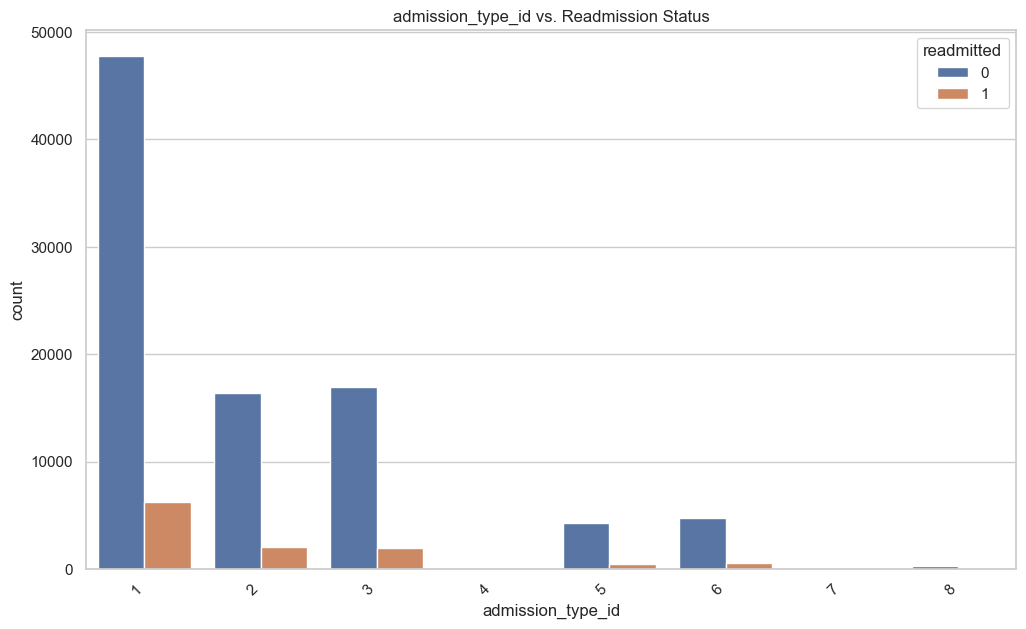

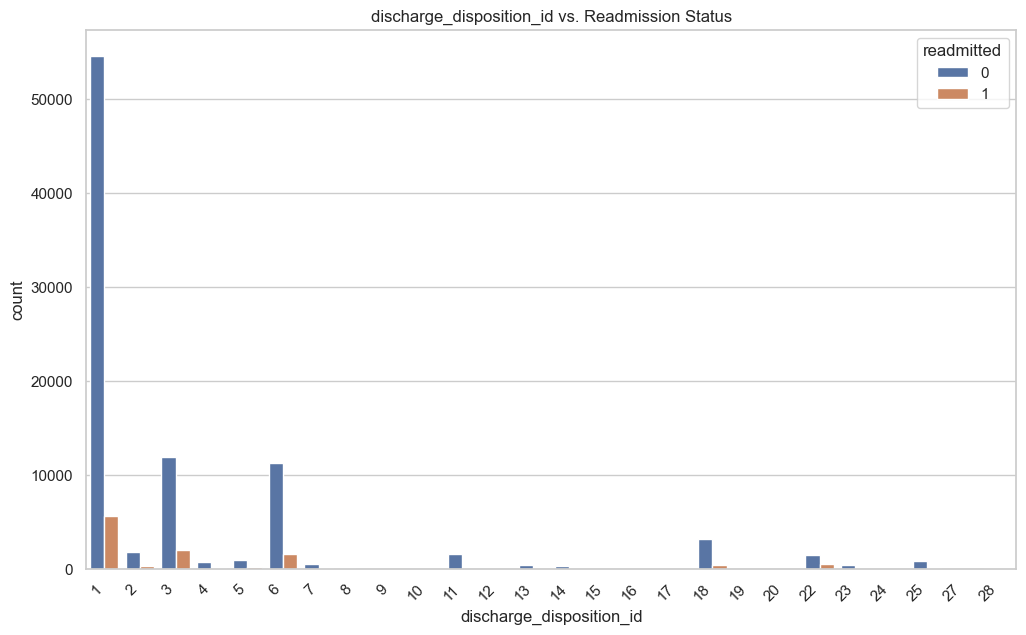

In [12]:
# Categorical features vs. Readmission
print("\n--- Bivariate Analysis: Categorical Features vs. Readmission ---")
for col in ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id']:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=col, hue='readmitted', data=df_clean)
    plt.title(f'{col} vs. Readmission Status')
    plt.xticks(rotation=45, ha='right')
    plt.show()


--- Correlation Matrix of Numerical Features ---


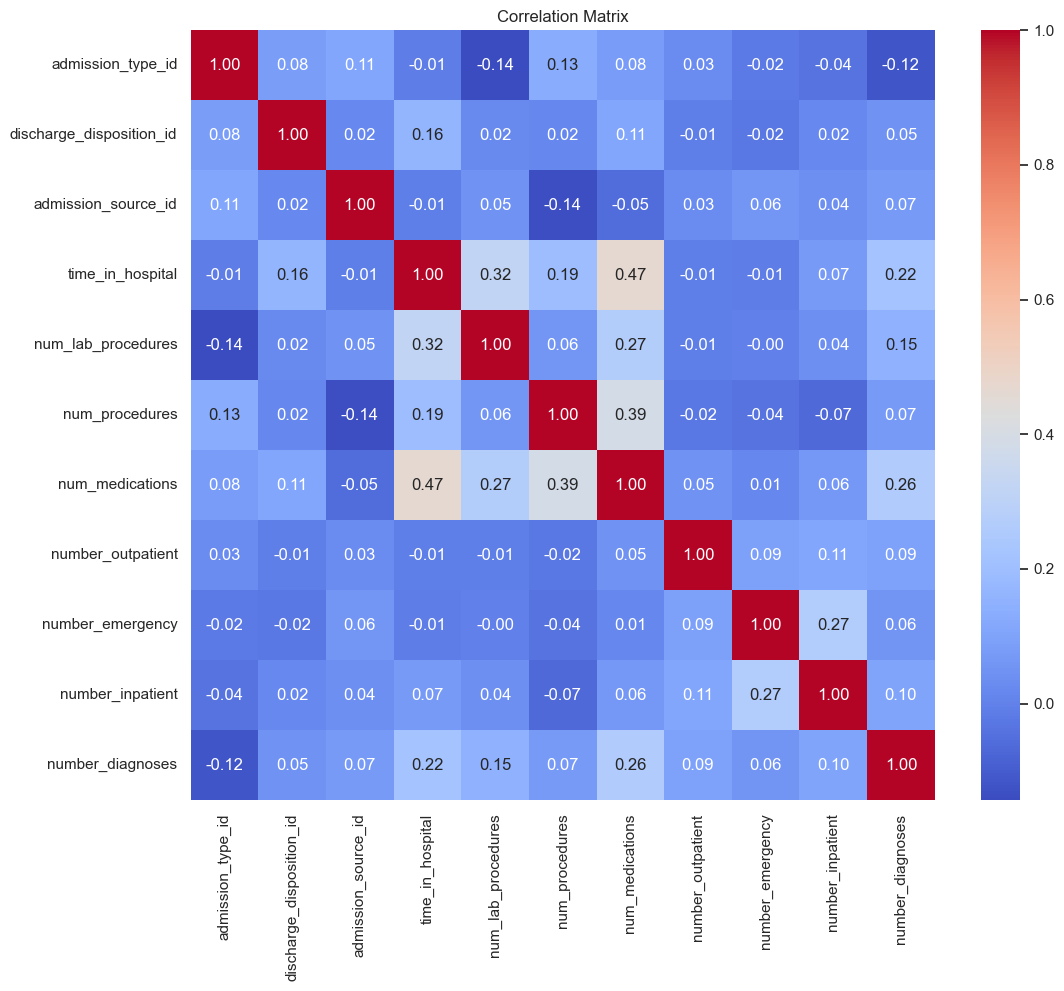

In [13]:
# --- Correlation Analysis ---
print("\n--- Correlation Matrix of Numerical Features ---")
plt.figure(figsize=(12, 10))
corr = df_clean[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()